In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
gt=pd.read_csv("gas_turbines.csv")
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gt.duplicated().sum()

0

In [5]:
gt.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [6]:
gt.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gt.shape

(15039, 11)

In [8]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
y=gt.iloc[:,7]
x=gt.drop(columns=('TEY'),axis=1)

In [10]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# Splitting data into train and test

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
x_train.shape

(12031, 10)

In [14]:
y_train.shape

(12031,)

# Creating a model

In [15]:
import tensorflow as tf

In [16]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model1.add(tf.keras.layers.Dense(10,activation='ReLU'))
model1.add(tf.keras.layers.Dense(1,activation='ReLU'))


In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compiling a model
model1.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [19]:
# fitting a model
history=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=100)

Epoch 1/50
121/121 [==============================] - 1s 2ms/step - loss: 18278.8945 - mse: 18278.8926 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 2/50
121/121 [==============================] - 0s 2ms/step - loss: 18278.8887 - mse: 18278.8887 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 3/50
121/121 [==============================] - 0s 2ms/step - loss: 18278.8828 - mse: 18278.8828 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 4/50
121/121 [==============================] - 0s 2ms/step - loss: 18278.8828 - mse: 18278.8828 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 5/50
121/121 [==============================] - 0s 1ms/step - loss: 18278.8828 - mse: 18278.8828 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 6/50
121/121 [==============================] - 0s 1ms/step - loss: 18278.

In [20]:
model1.save_weights("mywt.kmw")

In [21]:
score=model1.evaluate(x_train,y_train)
print("%s: %.2f%%" %(model1.metrics_names[1],score[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 18278.8887 - mse: 18278.8887 - mae: 134.2709
mse: 1827888.87%


# Visualize the training history

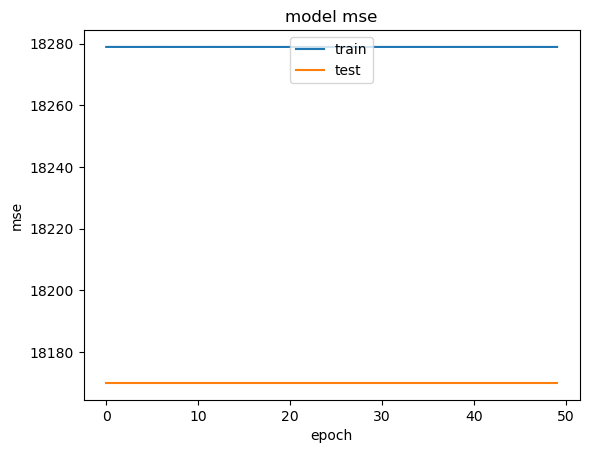

In [22]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('model mse')
plt.legend(['train','test'],loc='upper center')
plt.show()

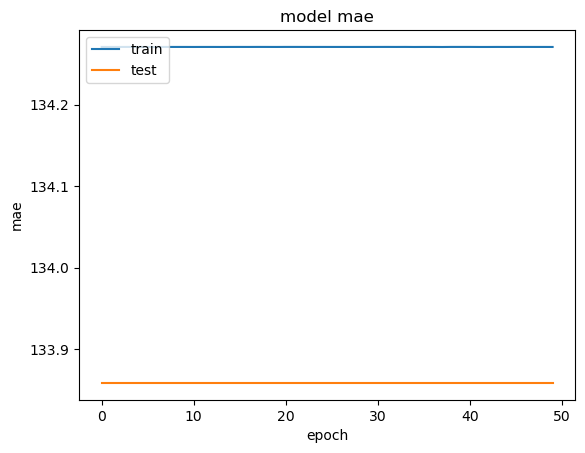

In [23]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

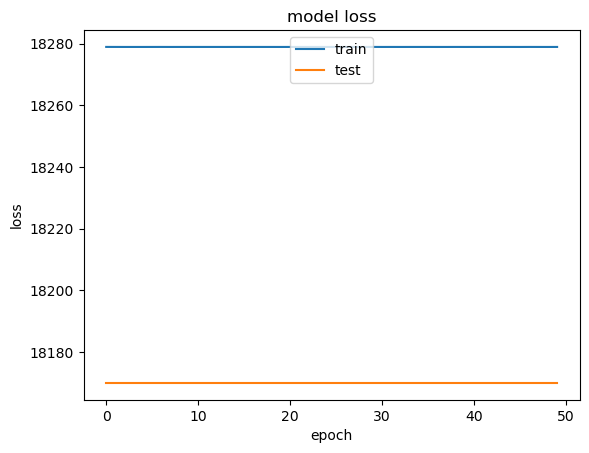

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_mse'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train','test'],loc='upper center')
plt.show()

# Evaluate the model

In [25]:
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)
train_rmse=mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared=False)
print('Training set rmse: %.3f, Testing set rmse: %.3f' %(train_rmse,test_rmse))

94/94 [==============================] - 0s 2ms/step
Training set rmse: 135.199, Testing set rmse: 134.796


# Hyperparameter Tuning using Randomized seaach CV

In [26]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [27]:
def keras_reg_model2(learning_rate,activation_function,init,neuron1,neuron2):
    model2=tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Dense(neuron1,input_dim=10,kernel_initializer=init,activation=activation_function))
    model2.add(tf.keras.layers.Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
    model2.add(tf.keras.layers.Dense(1,activation='linear'))
    adam=Adam(lr=learning_rate)
    model2.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
    return model2

In [28]:
keras_reg=KerasRegressor(build_fn=keras_reg_model2,verbose=0)

In [29]:
# Define the search parameters

batch_size=[10,50,100,500,1000,2000]
epochs=[25,50,80,100,150]
learning_rate=[0.001,0.01,0.1]
activation_function=['elu','ReLU','linear']
init=['uniform','normal','zero']
neuron1=[5,10,20,30]
neuron2=[5,10,20,30]
param_grids=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)
random_search=RandomizedSearchCV(estimator=keras_reg,param_distributions=param_grids,cv=5,n_jobs=-1,verbose=10,random_state=35)
random_result=random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [30]:
# Summerise the results

print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -2.4571964740753174
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.01, 'init': 'normal', 'epochs': 100, 'batch_size': 10, 'activation_function': 'linear'}


In [31]:
ddd=random_result.best_params_
keras_tuned=keras_reg_model2(learning_rate=ddd['learning_rate'],activation_function=ddd['activation_function'],init=ddd['init'],neuron1=ddd['neuron1'],neuron2=ddd['neuron2'])
history2=keras_tuned.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=ddd['epochs'],batch_size=ddd['batch_size'])

Epoch 1/100
1204/1204 [==============================] - 3s 2ms/step - loss: 95.6158 - mse: 95.6158 - mae: 5.5055 - val_loss: 29.1542 - val_mse: 29.1542 - val_mae: 5.1882
Epoch 2/100
1204/1204 [==============================] - 3s 2ms/step - loss: 7.8910 - mse: 7.8910 - mae: 2.2194 - val_loss: 35.9336 - val_mse: 35.9336 - val_mae: 5.8605
Epoch 3/100
1204/1204 [==============================] - 3s 2ms/step - loss: 7.4448 - mse: 7.4448 - mae: 2.1743 - val_loss: 3.7080 - val_mse: 3.7080 - val_mae: 1.5648
Epoch 4/100
1204/1204 [==============================] - 3s 2ms/step - loss: 8.0896 - mse: 8.0896 - mae: 2.2479 - val_loss: 26.7468 - val_mse: 26.7468 - val_mae: 5.0210
Epoch 5/100
1204/1204 [==============================] - 2s 2ms/step - loss: 5.7215 - mse: 5.7215 - mae: 1.9096 - val_loss: 1.8690 - val_mse: 1.8690 - val_mae: 1.0651
Epoch 6/100
1204/1204 [==============================] - 2s 2ms/step - loss: 5.6544 - mse: 5.6544 - mae: 1.8893 - val_loss: 1.9113 - val_mse: 1.9113 - val_ma

Epoch 50/100
1204/1204 [==============================] - 3s 2ms/step - loss: 1.9377 - mse: 1.9377 - mae: 1.0883 - val_loss: 1.5153 - val_mse: 1.5153 - val_mae: 0.9465
Epoch 51/100
1204/1204 [==============================] - 3s 2ms/step - loss: 2.0954 - mse: 2.0954 - mae: 1.1337 - val_loss: 4.6890 - val_mse: 4.6890 - val_mae: 1.9351
Epoch 52/100
1204/1204 [==============================] - 3s 2ms/step - loss: 2.5226 - mse: 2.5226 - mae: 1.2522 - val_loss: 1.2558 - val_mse: 1.2558 - val_mae: 0.8655
Epoch 53/100
1204/1204 [==============================] - 3s 2ms/step - loss: 2.4471 - mse: 2.4471 - mae: 1.2261 - val_loss: 1.1771 - val_mse: 1.1771 - val_mae: 0.8278
Epoch 54/100
1204/1204 [==============================] - 3s 2ms/step - loss: 2.7346 - mse: 2.7346 - mae: 1.2966 - val_loss: 3.3868 - val_mse: 3.3868 - val_mae: 1.5583
Epoch 55/100
1204/1204 [==============================] - 3s 2ms/step - loss: 2.5623 - mse: 2.5623 - mae: 1.2695 - val_loss: 3.4270 - val_mse: 3.4270 - val_mae:

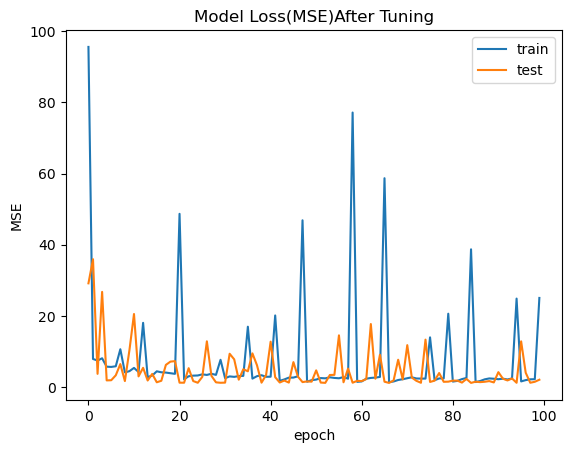

In [32]:
# PLotting Loss(MSE) After Tuning

plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

# Evaluate the model

In [33]:
y_train_pred_tuned=keras_tuned.predict(x_train)
y_test_pred_tuned=keras_tuned.predict(x_test)
train_rmse_tuned=mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned=mean_squared_error(y_test,y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f,Testing set rmse: %.3f' %(train_rmse_tuned,test_rmse_tuned))

94/94 [==============================] - 0s 1ms/step
Training set rmse : 1.417,Testing set rmse: 1.433


# Comparing base model and tuned model

In [34]:
final=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],'test rmse':[test_rmse,test_rmse_tuned]})

In [35]:
final

,models,train rmse,test rmse
0,base model,135.19943,134.796142
1,tuned model,1.41750,1.433343
